<a href="https://colab.research.google.com/github/AthariDeepa/ADMining/blob/main/lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy on modified dataset: 1.0
Confusion Matrix:
 [[10  0]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy on Breast Cancer Dataset: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy with modified parameters (liblinear & L1): 1.0
Confusion Matrix:
 [[10  0]
 [ 0 20]]
Classification Report:
               

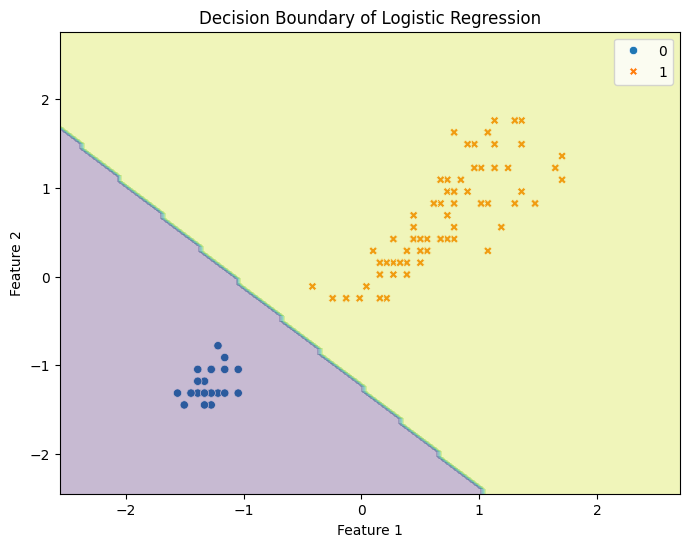

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
y = (iris.target != 0) * 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy on modified dataset:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_bc = data.data
y_bc = data.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)
scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)
model_bc = LogisticRegression()
model_bc.fit(X_train_bc, y_train_bc)
y_pred_bc = model_bc.predict(X_test_bc)
print("\nAccuracy on Breast Cancer Dataset:", accuracy_score(y_test_bc, y_pred_bc))
print("Confusion Matrix:\n", confusion_matrix(y_test_bc, y_pred_bc))
print("Classification Report:\n", classification_report(y_test_bc, y_pred_bc))
model_param = LogisticRegression(solver='liblinear', penalty='l1', max_iter=100)
model_param.fit(X_train, y_train)
y_pred_param = model_param.predict(X_test)
print("\nAccuracy with modified parameters (liblinear & L1):", accuracy_score(y_test, y_pred_param))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_param))
print("Classification Report:\n", classification_report(y_test, y_pred_param))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()